# 나이브 베이즈 분류 모형(Naive Bayes classification model)

나이브 베이즈 분류 모형도 대표적인 생성 모형이다. 

## 나이브 가정

likelihood $P(x \mid y = C_k)$로 모든 $x=(x_1, \ldots, x_n)$에 대한 결합 확률(joint probability) $P(x_1, \ldots, x_n \mid y = C_k)$ 을 사용해야 한다. 

실제로 구하기 어렵기 때문에 모든 차원의 개별 독립 변수 요소들이 서로 독립(independent)이라는 가정을 사용한다. 

이러한 가정 베이즈 분류 모형에 사용하는 것을 **나이브 베이즈 분류 모형**이라고 한다.

나이브 베이즈 분류 모형에서는 $x$ 벡터의 결합 확률이 개별 원소 $x_i$의 확률의 곱으로 나타난다.

$$
likelihood = P(x_1, \ldots, x_n \mid y = C_k) = \prod_{i=1}^n P(x_i \mid y = C_k)
$$

$$
P(y = C_k \mid x) \;\; \propto \;\; \prod_{i=1}^n P(x_{i} \mid y = C_k)\; P(y = C_k)
$$


## 가우시안 정규 분포 likelihood 모형

- $x$ 벡터의 원소가 모두 실수일 때

- 클래스마다 특정한 값 주변에서 발생할 때

$$ P(x_i \mid y = C_k) = \dfrac{1}{\sqrt{2\pi\sigma_{i,k}^2}} \exp \left(-\dfrac{(x_i-\mu_{i,k})^2}{2\sigma_{i,k}^2}\right) $$
  

## 베르누이 분포 Likelihood 모형

- $x = (x_1,\ldots, x_D)$의 각 원소 $x_i$가 0 또는 1이라는 값만을 가질 수 있다

- 클래스 $y = C_k$ $(k=1,\ldots,K)$마다도 $x_i$가 1이 될 확률이 다르다.


- 즉, 전체 $D \times K$의 동전이 존재하며 같은 클래스에 속하는 $D$개의 동전이 하나의 동전 세트를 구성하고 이러한 동전 세트가 $K$개 있다고 생각할 수 있다.


$$ P(x_i \mid y = C_k) = \theta_{i,k}^x (1-\theta_{i,k})^{(1-x_i)} $$

## 다항 분포 Likelihood 모형

- $D$개의 면을 가지는 주사위를 $\sum x_i$번 던져서 나온 결과로 본다.

$$ x = (1, 4, 0, 5) $$

- 4면체 주사위를 10번 던져서 1인 면이 1번, 2인 면이 4번, 4인 면이 5번 나온 결과로 해석한다.

- 각 클래스마다 주사위가 다르다고 가정하므로 $K$개의 클래스를 구분하는 문제에서는 $K$개의 주사위가 있다고 본다.

$$ P(x_1, \ldots, x_n \mid y = C_k) = \prod_i^n \theta_{i,k}^{x_i}$$

## Scikit-Learn에서 제공하는 나이브 베이즈 모형

* [`BernoulliNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html): 베르누이 분포 나이브 베이즈
* [`MultinomialNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html): 다항 분포 나이브 베이즈
* [`GaussianNB`](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html):	가우시안 정규 분포 나이브 베이즈

이 클래스들은 다음과 같은 속성값 및 메서드를 가진다.

### 사전 확률과 관련된 속성

* `classes_`

 * 타겟 Y의 클래스(라벨)


* `class_count_`

 * 타겟 Y의 값이 특정한 클래스인 표본 데이터의 수


* `class_prior_`

 * 타겟 Y의 무조건부 확률 분포 $ P(Y) $ (가우시안 정규 분포의 경우에만)
 

* `class_log_prior_`

 * 타겟 Y의 무조건부 확률 분포의 로그 $ \log P(Y) $ (베르누이 분포나 다항 분포의 경우에만)
 
 
### Likelihood 추정 속성


* `theta_ `, `sigma_` 

 * 가우시안 정규 분포의 기댓값 $\mu$ 과 분산 $\sigma^2$ (가우시안 정규 분포의 경우에만)
 
* `feature_count_`
 * 베르누이 분포 혹은 다항 분포의 각 독립변수값이 나타난 횟수 (베르누이 분포나 다항 분포의 경우에만)

* `feature_log_prob_ `

 * 베르누이 분포 혹은 다항 분포의 모수 벡터의 로그 (베르누이 분포나 다항 분포의 경우에만)
 
 $$ \log \theta = (\log \theta_1, \ldots, \log \theta_n) = \left( \log \dfrac{N_1}{N}, \ldots, \log \dfrac{N_K}{N} \right)$$
 
여기에서 $K$는 $x$가 가질 수 있는 클래스의 수, $N$은 전체 시도 횟수, $N_i$는 $i$번째 변수가 1이 나온 횟수이다. 


표본 데이터의 수가 적은 경우에는 다음과 같이 스무딩(smoothing)을 할 수도 있다.

 $$ \hat{\theta} = \frac{ N_{i} + \alpha}{N + \alpha K} $$ 

## 가우시안 정규 분포 나이브 베이즈 모형

- 실수인 두 개의 독립 변수 $x_1, x_2$를 가지는 분류 모형을 생각하자. 
- 이 값들은 클래스에 따라 다음처럼 분포가 달라진다.

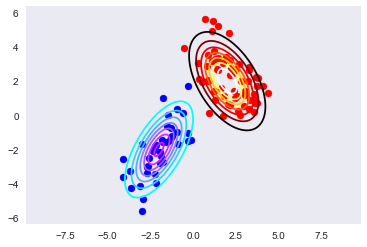

In [17]:
import scipy as sp

np.random.seed(0)
rv0 = sp.stats.multivariate_normal([-2, -2], [[1, 0.9], [0.9, 2]])
rv1 = sp.stats.multivariate_normal([2, 2], [[1.2, -0.8], [-0.8, 2]])
X0 = rv0.rvs(40)
X1 = rv1.rvs(60)
X = np.vstack([X0, X1])
y = np.hstack([np.zeros(40), np.ones(60)])

xx1 = np.linspace(-5, 5, 100)
xx2 = np.linspace(-5, 5, 100)
XX1, XX2 = np.meshgrid(xx1, xx2)
plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

In [18]:
rv0

In [5]:
X[:5]

array([[-3.65937565, -4.27892515],
       [-4.11410669, -2.56217408],
       [-2.92859796, -4.89992211],
       [-2.67683553, -3.35500055],
       [-2.1594698 , -1.71569175]])

In [6]:
y[:5]

array([0., 0., 0., 0., 0.])

In [3]:
from sklearn.naive_bayes import GaussianNB
model_norm = GaussianNB().fit(X, y)

In [7]:
model_norm.classes_

array([0., 1.])

In [8]:
model_norm.class_count_

array([40., 60.])

In [10]:
model_norm.class_prior_

array([0.4, 0.6])

- 확률 분포의 모수를 계산

In [11]:
model_norm.theta_[0], model_norm.sigma_[0]

(array([-1.96197643, -2.00597903]), array([1.02398854, 2.31390497]))

In [12]:
model_norm.theta_[1], model_norm.sigma_[1]

(array([2.19130701, 2.12626716]), array([1.25429371, 1.93742544]))

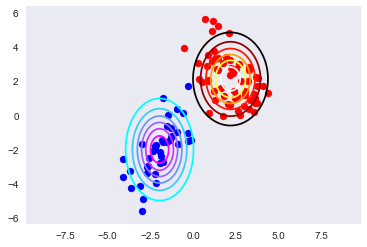

In [16]:
rv0 = sp.stats.multivariate_normal(model_norm.theta_[0], model_norm.sigma_[0])
rv1 = sp.stats.multivariate_normal(model_norm.theta_[1], model_norm.sigma_[1])

plt.grid(False)
plt.contour(XX1, XX2, rv0.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.cool)
plt.contour(XX1, XX2, rv1.pdf(np.dstack([XX1, XX2])), cmap=mpl.cm.hot)
plt.scatter(X0[:, 0], X0[:, 1], c='b')
plt.scatter(X1[:, 0], X1[:, 1], c='r')
plt.axis("equal")
plt.show()

In [19]:
x_new = [-0.7, -0.8]
model_norm.predict_proba([x_new])

array([[0.98300323, 0.01699677]])

나이브 베이즈 가정에 따라 두 입력 변수의 곱을 결합 확률로 계산한다.

In [20]:
likelihood = [sp.stats.norm(model_norm.theta_[0], np.sqrt(model_norm.sigma_[0])).pdf(x_new).prod(),
              sp.stats.norm(model_norm.theta_[1], np.sqrt(model_norm.sigma_[1])).pdf(x_new).prod()]
likelihood

[0.0346968402917242, 0.0003999540815189114]

In [21]:
posterior = likelihood * model_norm.class_prior_
posterior

array([0.01387874, 0.00023997])

이 값을 정규화하면 predict_proba 메서드로 구한 것과 같은 값이 나온다

In [24]:
posterior / posterior.sum()

array([0.98300323, 0.01699677])

## 베르누이 분포 나이브 베이즈 모형

In [26]:
np.random.seed(0)
X = np.random.randint(2, size=(10, 4))
y = np.array([0,0,0,0,1,1,1,1,1,1])
X

array([[0, 1, 1, 0],
       [1, 1, 1, 1],
       [1, 1, 1, 0],
       [0, 1, 0, 0],
       [0, 0, 0, 1],
       [0, 1, 1, 0],
       [0, 1, 1, 1],
       [1, 0, 1, 0],
       [1, 0, 1, 1],
       [0, 1, 1, 0]])

 첫번째 메일은 정상 메일이고 1번, 4번 키워드는 포함하지 않지만 2번, 3번 키워드를 포함한다고 볼 수 있다.

In [27]:
y

array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [28]:
from sklearn.naive_bayes import BernoulliNB
model_bern = BernoulliNB().fit(X, y)

In [29]:
model_bern.classes_

array([0, 1])

In [30]:
model_bern.class_count_

array([4., 6.])

In [31]:
np.exp(model_bern.class_log_prior_)

array([0.4, 0.6])

각 클래스 별로, 그리고 각 독립 변수 별로 다른 베르누이 확률 변수라고 가정하여 각 베르누이 확률 변수의 모수를 구하면 다음과 같다.

In [32]:
fc = model_bern.feature_count_
fc

array([[2., 4., 3., 1.],
       [2., 3., 5., 3.]])

In [33]:
fc / np.repeat(model_bern.class_count_[:, np.newaxis], 4, axis=1)

array([[0.5       , 1.        , 0.75      , 0.25      ],
       [0.33333333, 0.5       , 0.83333333, 0.5       ]])

스무딩

In [35]:
theta = np.exp(model_bern.feature_log_prob_)
theta

array([[0.5       , 0.83333333, 0.66666667, 0.33333333],
       [0.375     , 0.5       , 0.75      , 0.5       ]])

이에 모형이 완성되었으니 테스트 데이터를 사용하여 예측을 해 본다. 예를 들어 1번, 2번 키워드를 포함한 메일이 정상 메일인지 스팸 메일인지 알아보자.

In [46]:
x_new = np.array([1, 1, 0, 0])
model_bern.predict_proba([x_new])

array([[0.72480181, 0.27519819]])

## 다항 분포 나이브 베이즈 모형

In [47]:
np.random.seed(0)
X0 = np.random.multinomial(10, [0.3, 0.5, 0.1, 0.1], size=4)
X1 = np.random.multinomial(8, [0.1, 0.1, 0.35, 0.45], size=6)
X = np.vstack([X0, X1])
y = np.array([0,0,0,0,1,1,1,1,1,1])
print(X)
print(y)

[[3 4 1 2]
 [3 5 1 1]
 [3 3 0 4]
 [3 4 1 2]
 [1 2 1 4]
 [0 0 5 3]
 [1 2 4 1]
 [1 1 4 2]
 [0 1 2 5]
 [2 1 2 3]]
[0 0 0 0 1 1 1 1 1 1]


In [48]:
from sklearn.naive_bayes import MultinomialNB
model_mult = MultinomialNB().fit(X, y)

In [49]:
model_mult.classes_

array([0, 1])

In [50]:
model_mult.class_count_

array([4., 6.])

In [51]:
np.exp(model_mult.class_log_prior_)

array([0.4, 0.6])

우선 각 클래스 별로 각각의 면이 나온 횟수는 다음과 같다

In [52]:
fc = model_mult.feature_count_
fc

array([[12., 16.,  3.,  9.],
       [ 5.,  7., 18., 18.]])

이 데이터에서 클래스 Y=0인 주사위를 던진 횟수는 첫번째 행의 값의 합인 40이므로 클래스 Y=0인 주사위를 던져 1이라는 면이 나올 확률은 다음처럼 계산할 수 있다.

$$ \theta_{1,Y=0} = \dfrac{12}{40} = 0.3 $$

In [53]:
fc / np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1)

array([[0.3       , 0.4       , 0.075     , 0.225     ],
       [0.10416667, 0.14583333, 0.375     , 0.375     ]])

스무딩

In [54]:
(fc + model_mult.alpha) / (np.repeat(fc.sum(axis=1)[:, np.newaxis], 4, axis=1) + model_mult.alpha * X.shape[1])

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [55]:
theta = np.exp(model_mult.feature_log_prob_)
theta

array([[0.29545455, 0.38636364, 0.09090909, 0.22727273],
       [0.11538462, 0.15384615, 0.36538462, 0.36538462]])

In [56]:
x_new = np.array([10, 10, 10, 10])
model_mult.predict_proba([x_new])

#p = (theta ** x_new).prod(axis=1)*np.exp(model_bern.class_log_prior_)
#p / p.sum()

array([[0.38848858, 0.61151142]])

## 뉴스 그룹 분류

In [57]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups(subset="all")
X = news.data
y = news.target

from sklearn.feature_extraction.text import TfidfVectorizer, HashingVectorizer, CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model1 = Pipeline([
            ('vect', CountVectorizer()), 
            ('model', MultinomialNB()),
         ])
model2 = Pipeline([
            ('vect', TfidfVectorizer()),
            ('model', MultinomialNB()),
         ])
model3 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english")),
            ('model', MultinomialNB()),
         ])
model4 = Pipeline([
            ('vect', TfidfVectorizer(stop_words="english", 
                                     token_pattern=r"\b[a-z0-9_\-\.]+[a-z][a-z0-9_\-\.]+\b")),
            ('model', MultinomialNB()),
         ])

In [58]:
%%time
from sklearn.model_selection import cross_val_score, KFold

for i, model in enumerate([model1, model2, model3, model4]):
    scores = cross_val_score(model, X, y, cv=5)
    print(("Model{0:d}: Mean score: {1:.3f}").format(i, np.mean(scores)))

Model0: Mean score: 0.855
Model1: Mean score: 0.856
Model2: Mean score: 0.883
Model3: Mean score: 0.888
CPU times: user 1min 34s, sys: 2.56 s, total: 1min 37s
Wall time: 1min 37s
